In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
from astropy.wcs import WCS
from astropy.table import Table

import regions
from regions import Regions

In [7]:
cd ..

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament


In [8]:
from catalog_query import get_catalog
import cutout_manager as cm

In [9]:
cd notebooks/

/blue/adamginsburg/savannahgramze/cloudc/lactea-filament/lactea-filament/notebooks


In [12]:

coord = SkyCoord(0.3920821663, 0.0472840774, unit=(u.deg, u.deg), frame='galactic')
l = 5.6*u.arcmin
w = 3.4*u.arcmin

cutout_I4 = cm.get_cutout_I4(coord, w, l)

In [19]:
cat_name = 'J/ApJS/227/10'

cat = get_catalog(cat_name, coord, w, l)
cat_coords = SkyCoord(cat['RAJ2000'], cat['DEJ2000'], unit=(u.hour, u.deg), frame='icrs')

In [43]:
cat

Name,RAJ2000,e_RAJ2000,DEJ2000,e_DEJ2000,GLON,GLAT,Flux,e_Flux,Vel,Width,l_TB,TB
,,s,,arcsec,deg,deg,mJy,mJy,km / s,km / s,,100000 K
str13,str12,float32,str12,float32,float32,float32,int32,int16,float32,float32,str1,float32
GCACH3OH.1854,17 46 20.457,0.006,-28 33 31.24,0.009,0.405,0.062,252,28,19.5,1.0,>,0.34
GCACH3OH.1857,17 46 20.606,0.006,-28 33 36.76,0.009,0.404,0.060,227,26,19.5,1.0,>,0.30
GCACH3OH.1858,17 46 20.661,0.003,-28 33 29.66,0.005,0.405,0.061,249,22,19.5,1.0,>,0.33
GCACH3OH.1859,17 46 20.678,0.006,-28 33 29.18,0.004,0.405,0.061,218,26,19.5,1.0,>,0.29
GCACH3OH.1862,17 46 20.807,0.002,-28 33 27.88,0.006,0.406,0.061,262,10,19.5,1.0,>,0.35
GCACH3OH.1864,17 46 20.907,0.005,-28 33 30.41,0.011,0.406,0.060,259,30,19.5,1.0,>,0.35
GCACH3OH.1865,17 46 20.929,0.006,-28 33 37.48,0.008,0.404,0.059,215,26,19.5,1.0,>,0.29
GCACH3OH.1866,17 46 20.934,0.008,-28 33 29.57,0.008,0.406,0.060,233,20,19.5,1.0,>,0.31


In [21]:
cat_coords = cat_coords.transform_to('galactic')

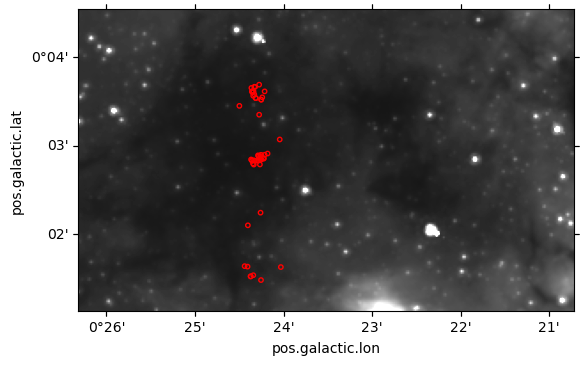

In [27]:
ax = plt.subplot(projection=cutout_I4.wcs)
ax.imshow(cutout_I4.data, origin='lower', cmap='gray', vmin=-1, vmax=600)
ax.scatter(cat_coords.l, cat_coords.b, transform=ax.get_transform('world'), s=10, edgecolor='red', facecolor='none')

In [34]:
fn_dan = '/orange/adamginsburg/jwst/cloudc/alma/danwalker/cloudd-12m7msd-newcasa.fits'
cutout_dan = cm.get_cutout(fn_dan, coord, w, l)

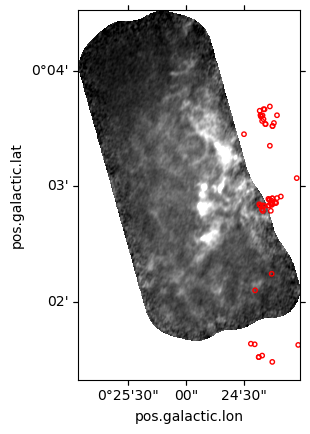

In [37]:
ax = plt.subplot(projection=cutout_dan.wcs)
ax.imshow(cutout_dan.data, origin='lower', cmap='gray', vmin=np.nanpercentile(cutout_dan.data, 1), vmax=np.nanpercentile(cutout_dan.data, 99))
ax.scatter(cat_coords.l, cat_coords.b, transform=ax.get_transform('world'), s=10, edgecolor='red', facecolor='none')

In [38]:
fn_cloudc = '/orange/adamginsburg/jwst/cloudc/alma/member.uid___A001_X1590_X282a.CloudC_sci.spw29.mfs.I.manual.image.pbcor.fits'

cutout_cloudc = cm.get_cutout(fn_cloudc, coord, w, l)

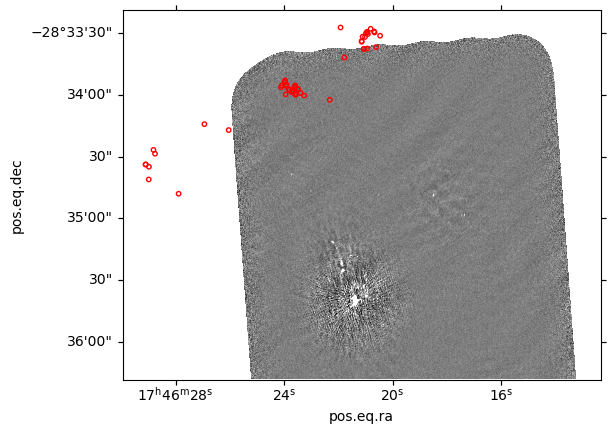

In [40]:
ax = plt.subplot(projection=cutout_cloudc.wcs)
ax.imshow(cutout_cloudc.data, origin='lower', cmap='gray', vmin=np.nanpercentile(cutout_cloudc.data, 1), vmax=np.nanpercentile(cutout_cloudc.data, 99))
ax.scatter(cat_coords.icrs.ra, cat_coords.icrs.dec, transform=ax.get_transform('world'), s=10, edgecolor='red', facecolor='none')